In [1]:
# Make the required import for directory access
import os

In [2]:
# Name of the new model
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
# Name for the pretrained model
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
# Link for the pretrained model download
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
# Name of the Script to be used to generate the TFRecord
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
# Name of the label map file
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
# Add OS paths to the required directory
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
# List some files required for model training
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is E2A5-C910

 Directory of C:\Users\tegve\Projects2022\TFODCapstone

2022-02-21  11:50 PM    <DIR>          .
2022-02-21  10:35 PM    <DIR>          ..
2022-02-18  01:30 AM                20 .gitignore
2022-02-10  05:40 PM    <DIR>          .ipynb_checkpoints
2022-02-19  12:48 AM    <DIR>          Datasets
2022-02-19  12:50 AM    <DIR>          Final Dataset
2022-02-21  09:59 PM    <DIR>          Final Dataset New
2022-02-21  10:12 PM        27,446,598 Final Dataset New.zip
2022-02-21  11:50 PM               434 GenerateRecordFile.txt
2022-02-21  10:50 PM             6,537 generate_tfrecord.py
2022-02-21  10:50 PM           627,483 model_training.ipynb
2022-02-10  09:28 PM           186,992 Object Detection Model Training.pdf
2022-02-21  10:12 PM            17,771 requirements.txt
2022-02-21  10:08 PM    <DIR>          Tensorflow
2022-02-17  11:54 PM    <DIR>          TestMedia
2022-02-22  03:18 PM    <DIR>          Utilities
       

In [6]:
# Create the required directories
# NOTE: This does not need to be re-run
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
import os
api_model_path = os.path.join('tensorflow', 'models')
api_model_path

'tensorflow\\models'

In [8]:
# NOTE: Do not re-run this after running it once
# Clone the object detection models directory
!git clone https://github.com/tensorflow/models {api_model_path}

Cloning into 'tensorflow\models'...
Updating files:  71% (2123/2962)
Updating files:  72% (2133/2962)
Updating files:  73% (2163/2962)
Updating files:  74% (2192/2962)
Updating files:  75% (2222/2962)
Updating files:  76% (2252/2962)
Updating files:  77% (2281/2962)
Updating files:  78% (2311/2962)
Updating files:  79% (2340/2962)
Updating files:  80% (2370/2962)
Updating files:  81% (2400/2962)
Updating files:  82% (2429/2962)
Updating files:  83% (2459/2962)
Updating files:  84% (2489/2962)
Updating files:  85% (2518/2962)
Updating files:  86% (2548/2962)
Updating files:  87% (2577/2962)
Updating files:  88% (2607/2962)
Updating files:  89% (2637/2962)
Updating files:  90% (2666/2962)
Updating files:  91% (2696/2962)
Updating files:  92% (2726/2962)
Updating files:  93% (2755/2962)
Updating files:  94% (2785/2962)
Updating files:  95% (2814/2962)
Updating files:  96% (2844/2962)
Updating files:  97% (2874/2962)
Updating files:  98% (2903/2962)
Updating files:  99% (2933/2962)
Updatin

In [6]:
# THIS IS WHERE THE INSTALLATIONS FOR MODEL TRAINING BEGIN
!pip install wget

In [7]:
!pip list
# Get name for the operating system
os.name
import wget

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astunparse                   1.6.3
attrs                        21.4.0
backcall                     0.2.0
beautifulsoup4               4.10.0
bleach                       4.1.0
bs4                          0.0.1
cachetools                   5.0.0
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.11
colorama                     0.4.4
contextlib2                  21.6.0
cycler                       0.11.0
Cython                       3.0.0a10
debugpy                      1.5.1
decorator                    5.1.0
defusedxml                   0.7.1
entrypoints                  0.3
flatbuffers                  2.0
gast                         0.5.3
gin-config                   0.5.0
google-auth                  2.6.0
google-auth-oauthlib        

In [11]:
# NOTE: Do not re-run unless verification script fails 
# Link to install the protocol buffers
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
# wget is the python library to fetch online data
wget.download(url)
# Move the downloaded folder to the previously specified path
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
# Move to the new path and extract the ZIP folder
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
# Add the protocol buffer to the environment variable
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e .

100% [..........................................................................] 1468733 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detec

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\cython-3.0.0a10-py3.9.egg\Cython\Compiler\Main.py:346: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: C:\Users\tegve\AppData\Local\Temp\easy_install-8f03_di1\apache-beam-2.37.0rc2\apache_beam\coders\coder_impl.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\cython-3.0.0a10-py3.9.egg\Cython\Compiler\Main.py:346: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: C:\Users\tegve\AppData\L

copying object_detection\meta_architectures\deepmac_meta_arch_test.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\faster_rcnn_meta_arch.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\faster_rcnn_meta_arch_test.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\faster_rcnn_meta_arch_test_lib.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\rfcn_meta_arch.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\rfcn_meta_arch_test.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\ssd_meta_arch.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\ssd_meta_arch_test.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\ssd_meta_arch_tes

Obtaining file:///C:/Users/tegve/Projects%20Winter%202022/TFOD%20Capstone/Tensorflow/models/research/slim
  Running setup.py develop for slim


In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation by running a verification script
!python {VERIFICATION_SCRIPT}

2022-02-22 15:21:50.786358: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-02-22 15:21:50.786595: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-22 15:21:57.077984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-02-22 15:21:57.078546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-02-22 15:21:57.079329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-02-22 15:21:57.080314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [15]:
# These were the installations required to remove the errors
!pip install tensorflow --upgrade
!pip install cycler
!pip install kiwisolver
!pip install pyyaml
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2
!pip install Pillow

Found existing installation: protobuf 3.19.4
Uninstalling protobuf-3.19.4:
  Successfully uninstalled protobuf-3.19.4
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-models-official 2.8.0 requires sentencepiece, which is not installed.
tf-models-official 2.8.0 requires seqeval, which is not installed.


  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached matplotlib-3.2.0-cp39-cp39-win_amd64.whl



tf-models-official 2.8.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.8.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.8.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.8.0 requires tensorflow-text~=2.8.0, which is not installed.
tf-models-official 2.8.0 requires pyyaml<6.0,>=5.1, but you have pyyaml 6.0 which is incompatible.


In [9]:
# Import Object Detection API from Tensorflow - Restart Kernel if this does not work
import object_detection

In [14]:
!pip list
!pip install bs4

Package                      Version             Location
---------------------------- ------------------- ---------------------------------------------------------------------------------
absl-py                      1.0.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astunparse                   1.6.3
attrs                        21.4.0
backcall                     0.2.0
beautifulsoup4               4.10.0
bleach                       4.1.0
bs4                          0.0.1
cachetools                   5.0.0
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.11
colorama                     0.4.4
contextlib2                  21.6.0
cycler                       0.11.0
Cython                       3.0.0a10
debugpy                      1.5.1
decorator                    5.1.0
defusedxml                   0.7.1
entrypoints                  0.3
flatbuffers                  2.0
gast                         0

In [17]:
# Download the pretrained model from the specified URL
wget.download(PRETRAINED_MODEL_URL)
# Move the extracted folder to the specified path
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
# Extract the fetched folder
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

 36% [..........................                                              ]  7446528 / 20515344

 58% [..........................................                              ] 11976704 / 20515344

 78% [........................................................                ] 16080896 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [8]:
labels = [{'name':'Car', 'id':1}, {'name':'Truck', 'id':2}, {'name':'Pedestrian', 'id':3}, {'name':'Bus', 'id':4}, {'name':'Sign', 'id':5}, {'name':'TrafficLight', 'id':6}, {'name':'FireHydrant', 'id':7}, {'name': 'Bicycle', 'id':8}, {'name':'Motorcycle', 'id':9}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [19]:
# Move all the requirements to a requirements.txt file to set a github milestone
!pip freeze >> requirements.txt

In [20]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is E2A5-C910

 Directory of C:\Users\tegve\Projects Winter 2022\TFOD Capstone

2022-02-21  10:11 PM    <DIR>          .
2022-02-16  04:00 PM    <DIR>          ..
2022-02-18  01:30 AM                20 .gitignore
2022-02-10  05:40 PM    <DIR>          .ipynb_checkpoints
2022-02-19  12:48 AM    <DIR>          Datasets
2022-02-19  12:50 AM    <DIR>          Final Dataset
2022-02-21  09:59 PM    <DIR>          Final Dataset New
2022-02-21  10:11 PM           345,301 model_training.ipynb
2022-02-10  09:28 PM           186,992 Object Detection Model Training.pdf
2022-02-21  10:12 PM            17,771 requirements.txt
2022-02-21  10:08 PM    <DIR>          Tensorflow
2022-02-17  11:54 PM    <DIR>          TestMedia
2022-02-21  09:59 PM    <DIR>          Utilities
               4 File(s)        550,084 bytes
               9 Dir(s)  208,298,201,088 bytes free


In [9]:
# Download the generate tf record script
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [10]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [ ]:
# Missing installations in case the record file generation does not work
!pip install pytz

In [11]:
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [12]:
# Update the pipeline.config file for transfer learning
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [13]:
# Open the config file and store it in a variable
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [14]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [15]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [16]:
# Create the configuration file and update information
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [17]:
# Display the updated file
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [6]:
# Training the model
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [19]:
# Create and format a command to start model training
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
command

'python Tensorflow\\models\\research\\object_detection\\model_main_tf2.py --model_dir=Tensorflow\\workspace\\models\\my_ssd_mobnet --pipeline_config_path=Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config --num_train_steps=2000'

In [ ]:
# Run the command here or run it in the terminal to see real time progress

In [7]:
# Evaluate the model and get the precision and accuracy
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
command

'python Tensorflow\\models\\research\\object_detection\\model_main_tf2.py --model_dir=Tensorflow\\workspace\\models\\my_ssd_mobnet --pipeline_config_path=Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config --checkpoint_dir=Tensorflow\\workspace\\models\\my_ssd_mobnet'

In [8]:
# LOADING THE MODEL FOR DETECTION
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [10]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
# Make sure to specify the latest checkpoint in the paths
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-23')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [11]:
# Detect from image
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'Image1.jpg')

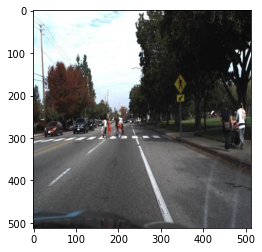

In [13]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
# Object detection in video
cap = cv2.VideoCapture('video1.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

ValueError: in user code:

    File "C:\Users\tegve\AppData\Local\Temp/ipykernel_24820/2674022334.py", line 12, in detect_fn  *
        image, shapes = detection_model.preprocess(image)
    File "C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\meta_architectures\ssd_meta_arch.py", line 484, in preprocess  *
        normalized_inputs, self._image_resizer_fn)
    File "C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\shape_utils.py", line 492, in resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    File "C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\shape_utils.py", line 246, in static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    File "C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\core\preprocessor.py", line 3327, in resize_image  *
        new_image = tf.image.resize_images(

    ValueError: 'images' must have either 3 or 4 dimensions.
